In [0]:
#importing all the packages
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning, RuntimeWarning,DeprecationWarning))
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split , cross_val_score
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder ,  StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn import svm
%matplotlib inline


In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# reading the data from the csv
df = pd.read_csv("drive/My Drive/vehicle_PCA.csv");

In [0]:
df.head(20)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


#ATTRIBUTES
	
	1) COMPACTNESS                               :	(average perim)**2/area
	2) CIRCULARITY                               : (average radius)**2/area
	3) DISTANCE CIRCULARITY                      :	area/(av.distance from border)**2
	4) RADIUS RATIO	                             : (max.rad-min.rad)/av.radius
	5) PR.AXIS ASPECT RATIO                      :	(minor axis)/(major axis)
	6) MAX.LENGTH ASPECT RATIO	                 :(length perp. max length)/(max length)
	7) SCATTER RATIO	                           :(inertia about minor axis)/(inertia about major axis)
	8) ELONGATEDNESS	 	                         :area/(shrink width)**2	
	9) PR.AXIS RECTANGULARITY	                   :area/(pr.axis length*pr.axis width)
	10) MAX.LENGTH RECTANGULARITY                :area/(max.length*length perp. to this)
	11) SCALED VARIANCE ALONG MAJOR AXIS 	       :(2nd order moment about minor axis)/area
	12) SCALED VARIANCE 	ALONG MINOR AXIS       :(2nd order moment about major axis)/area
	13) SCALED RADIUS OF GYRATION	               :(mavar+mivar)/area
	14) SKEWNESS ABOUT MAJOR AXIS                :(3rd order moment about major axis)/sigma_min**3
	15) SKEWNESS ABOUT 	MINOR AXIS               :(3rd order moment about minor axis)/sigma_maj**3 	
	16) KURTOSIS ABOUT 	MINOR AXIS               :(4th order moment about major axis)/sigma_min**4
	17) KURTOSIS ABOUT 	MAJOR AXIS               :(4th order moment about minor axis)/sigma_maj**4
	18) HOLLOWS RATIO                            :(area of hollows)/(area of bounding polygon)
  19)  NUMBER OF CLASSES                                                              :	3(	CAR, BUS, VAN)
  
  
  
  
 Where sigma_maj**2 is the variance along the major axis and
	sigma_min**2 is the variance along the minor axis, and
	
	area of hollows= area of bounding poly-area of object 
	
	 The area of the bounding polygon is found as a side result of
	the computation to find the maximum length. Each individual
	length computation yields a pair of calipers to the object
	orientated at every 5 degrees. The object is propagated into
	an image containing the union of these calipers to obtain an
	image of the bounding polygon. 

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

# INFORMATION 

1) All the columns except the target column are continuous .Some are integer type and some are float types

2) Since there is no object data type , means there are no junk entries

3) The above information shows that there are null entries

In [0]:
# calculation of null  entries in every column
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

#INFORMATION

There are very less entries which are empty in the columns. 

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


#INFORMATION

1)The data  in the columns  :scaled_variance.1	,scatter_ratio are seemed to be right skewed. Other columns seems to have almost normalised data.

2) No column has negative entries.

In [0]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

Here we can see that we have 3 groups , but the data is of 4 different models. Most probably , the different car models is treated as one.

In [0]:
# seperating  independent variables from the target column.
contCols = np.array(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'])

targetCol = np.array(['class'])

In [0]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]



Number of duplicate rows = 0


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


In [0]:
# filling the missing values with the median of the values of the class to which the particular null values belongs to .
import math
def getVal(string, df , col):
    return df[(df[col].notnull()) &(df['class'] == string)][col].median()

for col in range(0, len(contCols)):

    for (i, row) in df.iterrows():
            val = row[contCols[col]]
            if math.isnan(val):
                cls = row['class']
                med =getVal(cls, df, contCols[col])
                df.loc[i,contCols[col]] = med

In [0]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

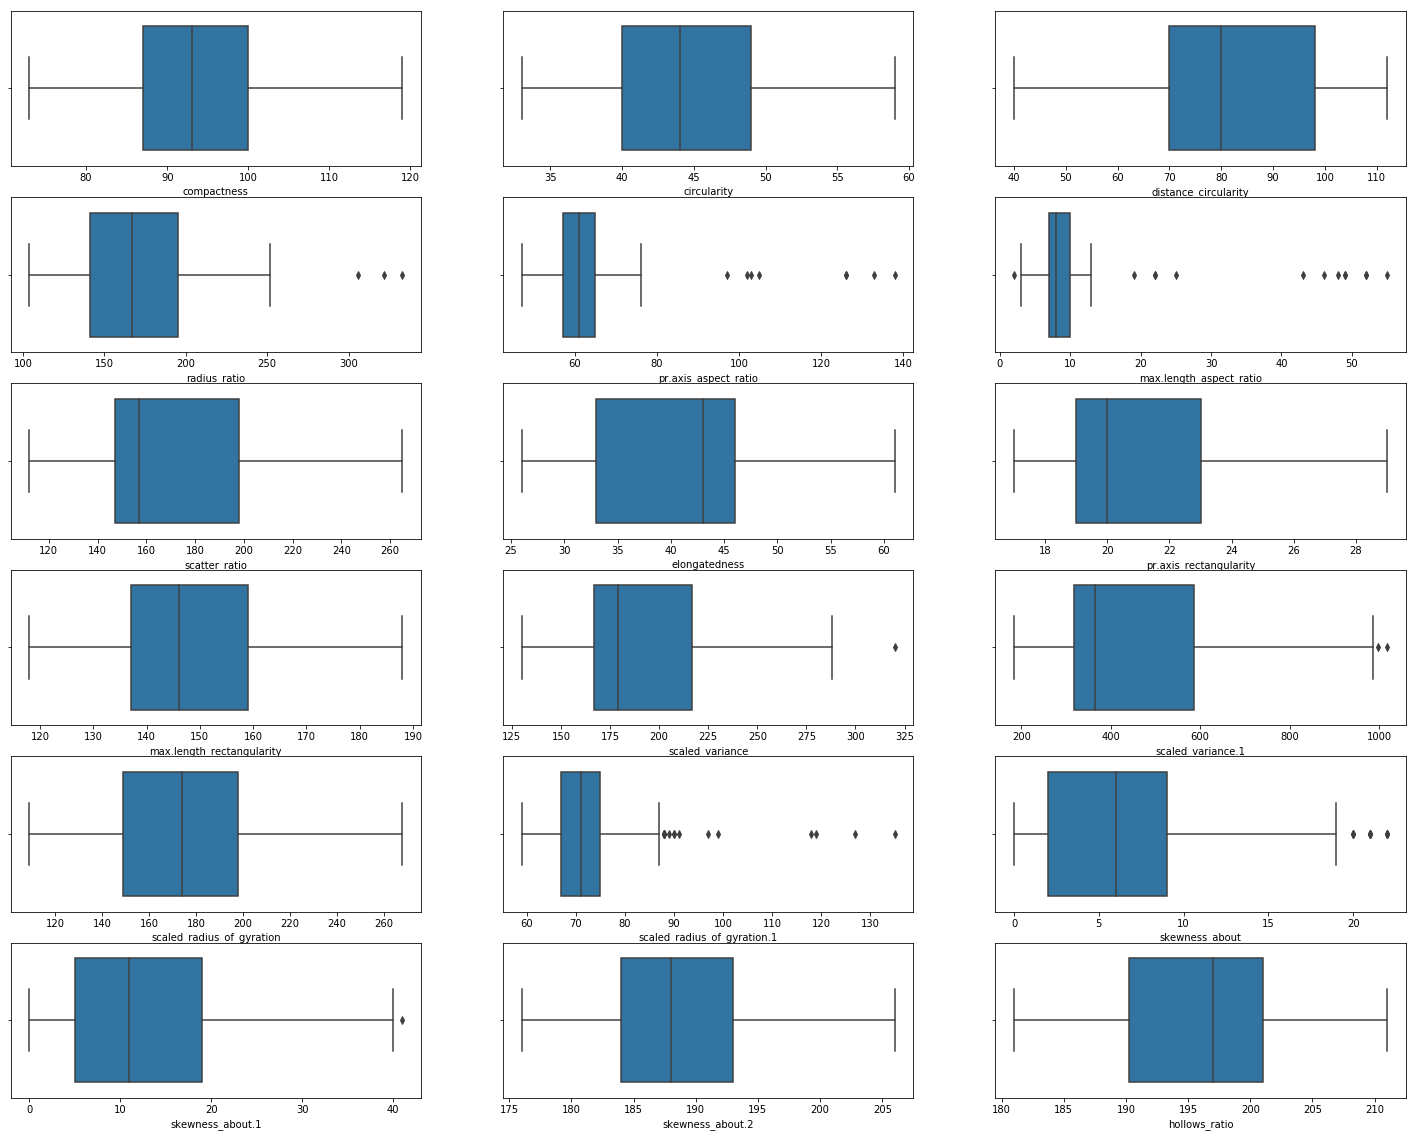

In [0]:
# function to draw the multiple graphs simultaneously
fg,axs= plt.subplots(nrows=6, ncols=3, figsize=(25,20))
for i in range(0, len(contCols)):
    row = int(i/3)
    col= (i)-(3*row)
    sns.boxplot(x=contCols[i] ,data=df, ax =axs[row,col])       

#INFORMATION

 The columns radius_ratio , pr.axis_aspect_ratio , max.length_aspect_ratio, scaled_variance , scaled_variance.1,scaled_radius_of_gyration.1, skewness_about, skewness_about.1  have outliers.
    

In [0]:
# Treating the outliers by replacing them with lowerbound and upperBound mentined below
for i in range(0,len(contCols) ):
  q1 = df[contCols[i]].quantile(0.25)
  q3 = df[contCols[i]].quantile(0.75)
  IQR = q3-q1
  lowerBound = q1- (1.5 * IQR) #replacing all the values less than lower bound with lower bound 
  upperBound =q3 + (1.5 * IQR) #replacing all the values greater than upper bound with upper bound 
  df.loc[df[contCols[i]] < lowerBound , contCols[i]] = lowerBound
  df.loc[df[contCols[i]] > upperBound , contCols[i]] = upperBound

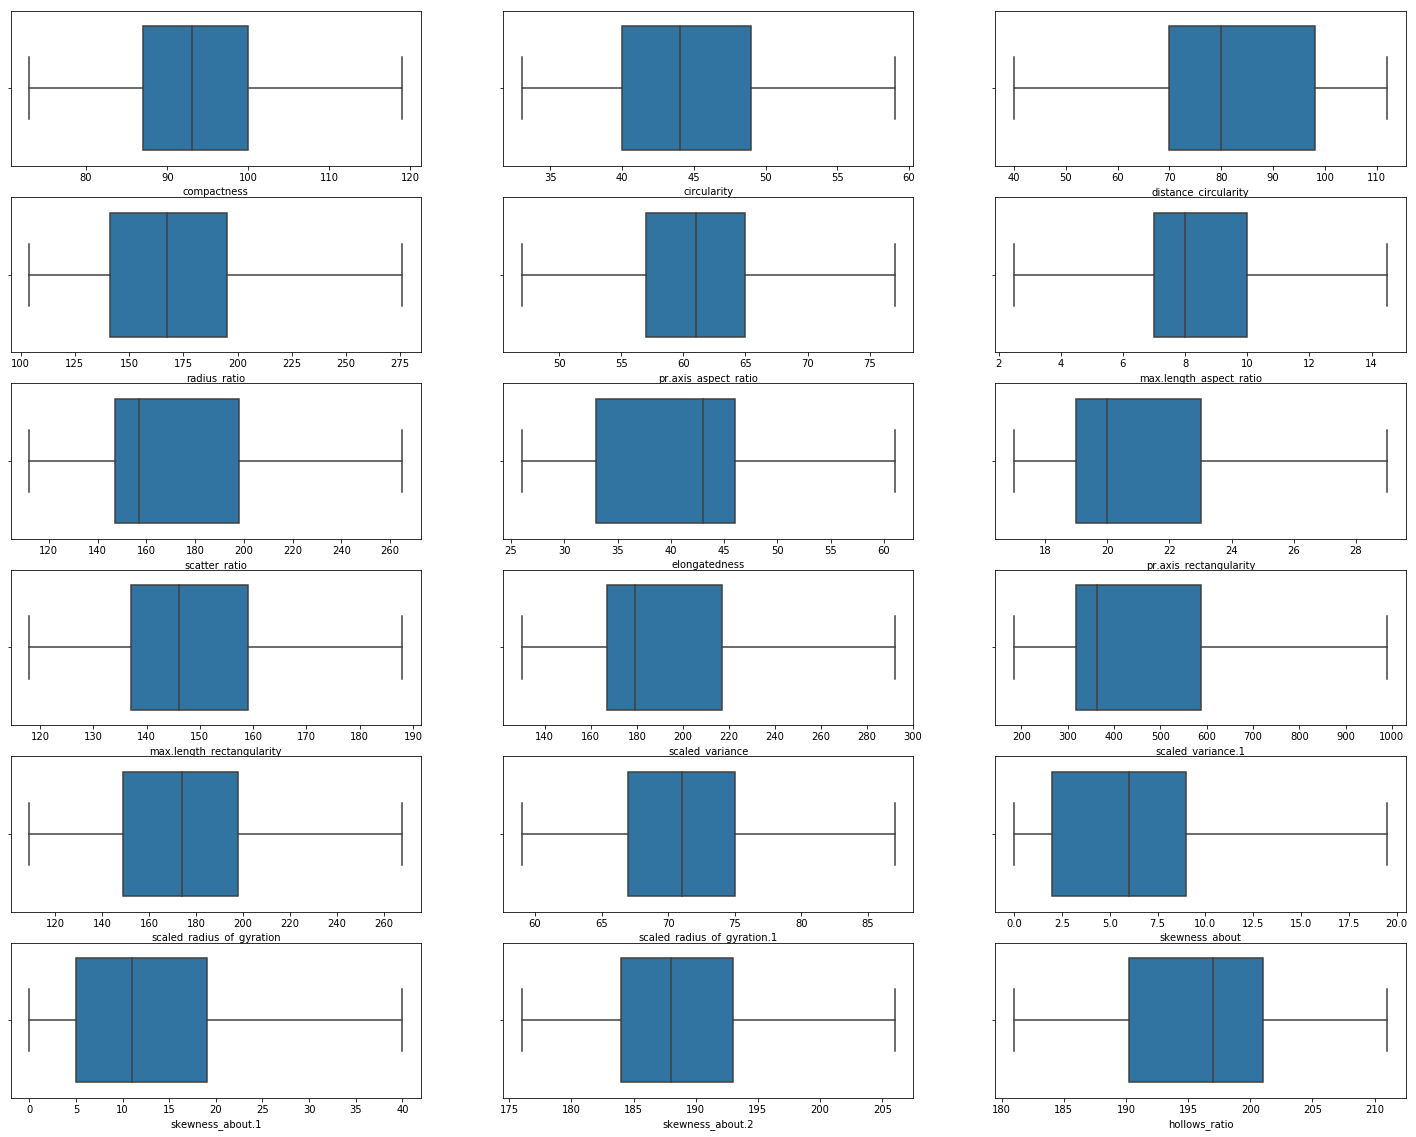

In [0]:

fg,axs= plt.subplots(nrows=6, ncols=3, figsize=(25,20))
for i in range(0, len(contCols)):
    row = int(i/3)
    col= (i)-(3*row)
    sns.boxplot(x=contCols[i] ,data=df, ax =axs[row,col])       

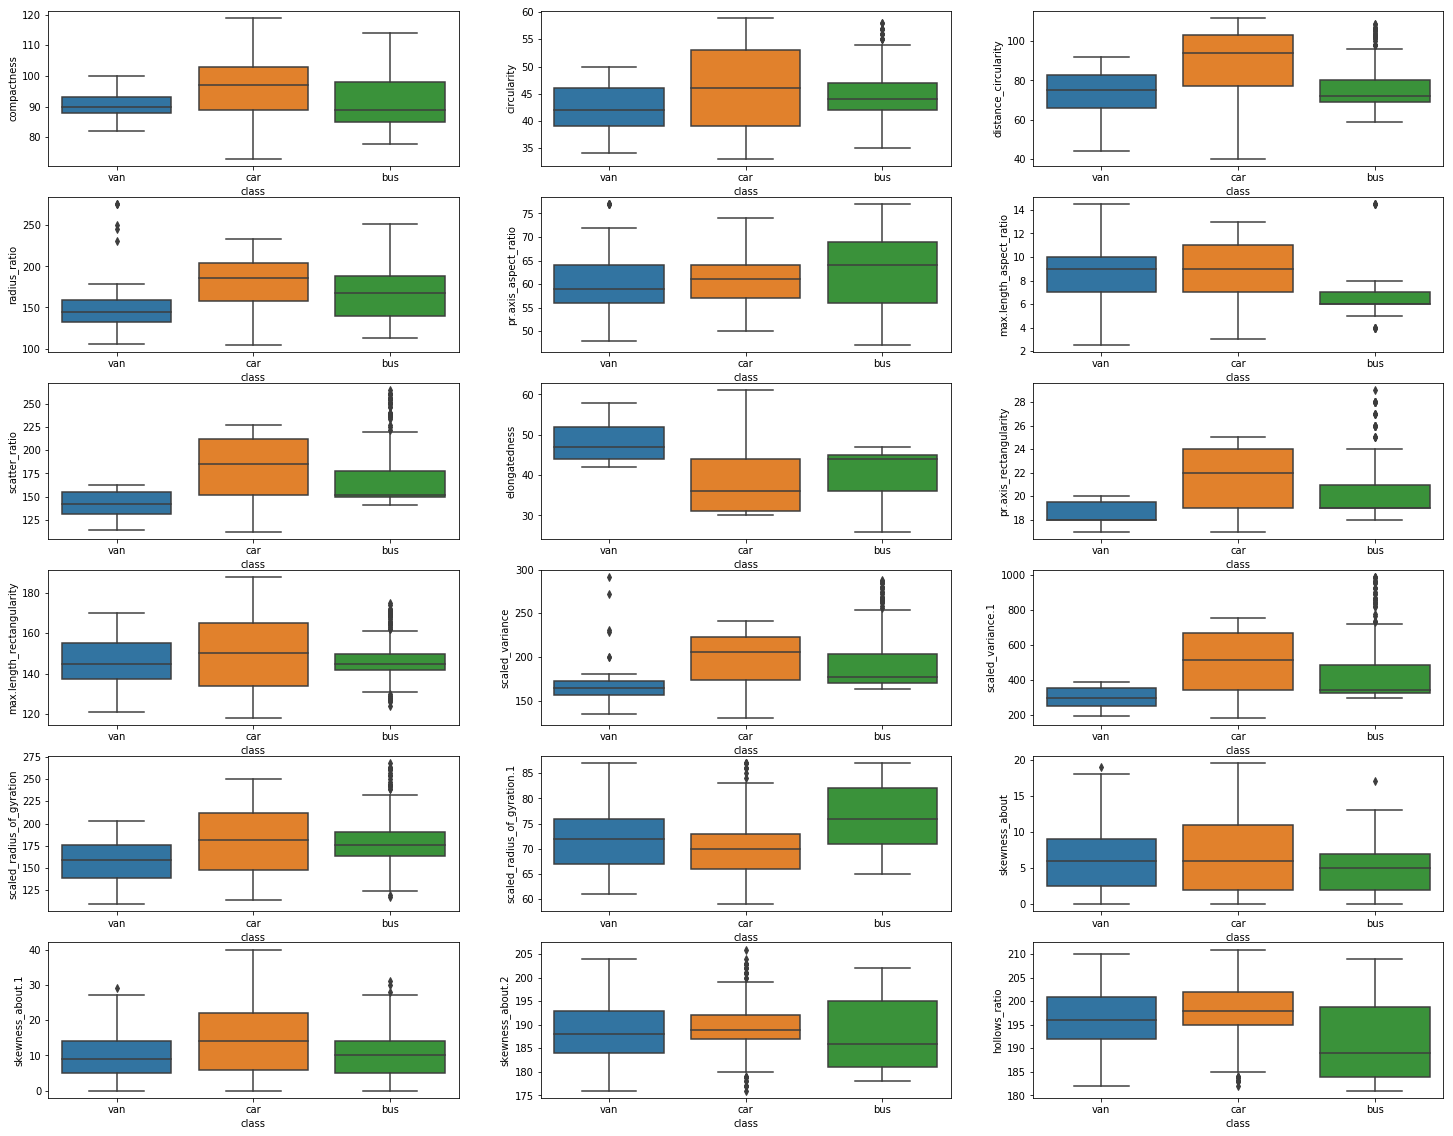

In [0]:

fg,axs= plt.subplots(nrows=6, ncols=3, figsize=(25,20))
for i in range(0, len(contCols)):
    row = int(i/3)
    col= (i)-(3*row)
    sns.boxplot(y=contCols[i], x='class' ,data=df, ax =axs[row,col])       

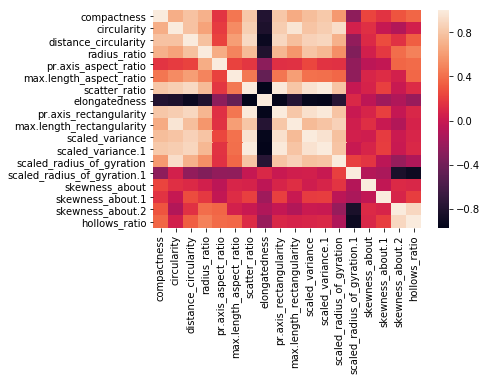

In [0]:
sns.heatmap(df.corr())

In [0]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

Both correlation matrix and  pairplots shows there are many variables which are highly corelated like scatter ratio , scaled variance , scaled variance 1 , max.length_rectagularity elongatedness and pr.axis_rectangularity.

Some more good linear relationships exits between the variables.

Hence PCA will be very effective in this case


In [0]:
#seperating independent variables from the target columns
y= df['class']
X= df.drop('class', axis=1)

In [0]:
# Label encoder to  encode the target column.
le = LabelEncoder()
y = le.fit_transform(y)  

In [0]:
# Normalizing the data before applyinh PCA on it.
stnd = StandardScaler()
inputDataNorm = stnd.fit_transform(X)
dfInputDataNorm=pd.DataFrame(inputDataNorm, columns = contCols)
dfInputDataNorm.shape

(846, 18)

In [0]:
#Getting eigen vectors and eigen vectors.
cov_matrix = np.cov(X.T)
print('Covariance Matrix \n%s', cov_matrix)

e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 6.78065662e+01  3.46292753e+01  1.02441426e+02  1.90214096e+02
   8.02039811e+00  7.94610768e+00  2.21854981e+02 -5.07072335e+01
   1.73544868e+01  8.08185544e+01  1.97033019e+02  1.18715813e+03
   1.56797482e+02 -1.40988403e+01  9.34081441e+00  1.15940493e+01
   1.51232392e+01  2.23917272e+01]
 [ 3.46292753e+01  3.76301272e+01  7.65274917e+01  1.27172252e+02
   7.08819506e+00  7.09641823e+00  1.72439477e+02 -3.93427211e+01
   1.34262034e+01  8.56459482e+01  1.52810248e+02  9.07998103e+02
   1.84919262e+02  2.25816022e+00  4.30138906e+00 -6.22938436e-01
  -3.95599480e+00  2.12303076e+00]
 [ 1.02441426e+02  7.65274917e+01  2.48196797e+02  4.04155625e+02
   2.10161624e+01  2.12574930e+01  4.71968562e+02 -1.12101730e+02
   3.64432722e+01  1.76891203e+02  4.25322892e+02  2.46646826e+03
   3.61155130e+02 -2.55162673e+01  8.64114454e+00  3.75198120e+01
   1.43059186e+01  3.92669660e+01]
 [ 1.90214096e+02  1.27172252e+02  4.04155625e+02  1.07625362e+03
   1.29996068e+

We will get the 18 eigen values and 18 eigen vectors . 

More is the eigen value , more is the variance that p-component contains.

In [0]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 96.15664025  97.8443064   98.98750345  99.31293828  99.5151477
  99.64460256  99.75724576  99.83057689  99.8938009   99.92646507
  99.95580782  99.97277644  99.98145179  99.98993767  99.99444433
  99.99751832  99.9997651  100.        ]


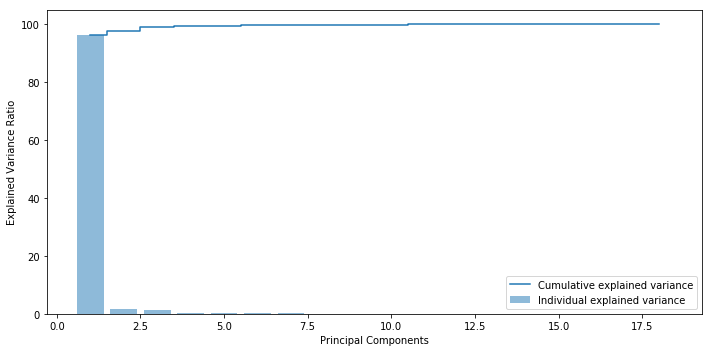

In [0]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [0]:
from sklearn.decomposition import PCA as sklearnPCA

In [0]:
  # Grid search function , which applies Grid search cv on different models and provide us the best possible combination of hyper parameters  . This functiob also gives the best score , ROC curve
  
  def applyGridSrch(modelObj,param_grid,x_train,x_test, y_train, y_test, label):
    clf = RandomizedSearchCV(modelObj, param_grid, cv=10, random_state =1 , n_jobs=1)
    clf.fit(x_train, y_train)
    print("=============================="+label+"=================================")
    print("========================================================================")
    print("Best parameters set found on development set:" , clf.best_params_)
    print("========================================================================")
    print("Best Scores", clf.best_score_)
    print("========================================================================")
    y_pred = clf.predict(x_test)
    ## Based on predicted value, compute various stats for model evaluation
    print('Accuracy Score: %.6f' % (accuracy_score(y_test,y_pred)*100))
#     print('Confusion Matrix: ', confusion_matrix(y_test,y_pred), sep = '\n')
    print("==========================================================================")
    ## Classification report
    cr = classification_report(y_test, y_pred)
    print("Classification Report")
    print("==========================================================================")
    print(cr)
    print("==========================================================================")
    return (accuracy_score(y_test,y_pred)*100)
            

In [0]:
# Applying the logistic , Naive Bayes and support vector machine classification  using grid search cv to  analyse their performance and choose the bedt classification. 
def multimodel(X,y,comp):
    score = np.array([]);
    name = np.array([]);
    noofcomp = np.array([]);
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)
    # Applying logistic Regression  model. Logistic regresion affects significantly by outlier treatment
    classifier = LogisticRegression() 
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 
    score= np.append(score,applyGridSrch(classifier,param_grid,X_train,X_test, y_train, y_test,"Logistic Regression")) # applied grid search cv on logistic regression
    name = np.append(name ,'Logistic Regression');
    noofcomp = np.append(noofcomp ,comp );
    print("\n")
    print("\n")
    classifier = GaussianNB()
    param_grid = {'var_smoothing':[1e-09,.0001,.001,0.1]} 
    score= np.append(score,applyGridSrch(classifier,param_grid,X_train,X_test, y_train, y_test,"Naive Bayes Theorem")) # applied grid search cv on naive bayes
    name = np.append(name ,'Naive Bayes Theorem');
    noofcomp = np.append(noofcomp ,comp);
    print("\n")
    print("\n")
      # Applying the Support Vector Classification model
    classifier = svm.SVC() 
    Cs = [0.001, 0.01, 0.1, 1, 10,0.05,0.5]
    gammas = [0.001, 0.01, 0.1, 1, 0.025,0.05,0.5]
    param_grid = {'C': Cs, 'gamma' : gammas ,'kernel' :['linear' ,'rbf']}
    score= np.append(score,applyGridSrch(classifier,param_grid,X_train,X_test, y_train, y_test,"Support Vector Machines")) # applied grid search cv on support vector machines
    name = np.append(name ,'Support Vector Machines');
    noofcomp = np.append(noofcomp , comp);
    print("\n")
    print("\n")
    data =np.array([name , score, noofcomp])
    return data

In [0]:
# Testing the different models without pca 
score= np.array([]);
score=multimodel(dfInputDataNorm,y,18);
score = np.transpose(score)
pdFrameNoPCA =pd.DataFrame(score ,columns=['Name' , 'Score' ,'NO of Components']);

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


==============================Logistic Regression=================================
Best parameters set found on development set: {'C': 1000}
Best Scores 0.9600591715976331
Accuracy Score: 95.294118
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.98      0.93        44
           1       1.00      0.93      0.97        89
           2       0.92      0.97      0.95        37

    accuracy                           0.95       170
   macro avg       0.94      0.96      0.95       170
weighted avg       0.96      0.95      0.95       170





==============================Naive Bayes Theorem=================================
Best parameters set found on development set: {'var_smoothing': 1e-09}
Best Scores 0.6124260355029586
Accuracy Score: 61.764706
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.27      0.42        44
           1       0.82      0.63      0.71        89

In [0]:
#Testin the different models with no of components be 8,9,10,11
Score_PCA = pd.DataFrame([],columns=[0,1,2]);
comp =np.array([8,9,10,11])
for i in range(0,len(comp)):
    print("\n")
    print("\n")
    print('===============================================NO OF COMPONENTS %.6f===============================================' %comp[i])
    sklearn_pca = sklearnPCA(n_components=comp[i])
    X_pca = sklearn_pca.fit_transform(dfInputDataNorm)
    temp= np.array([]);
    temp=multimodel(X_pca,y,comp[i])
    temp =np.transpose(temp)
    pdFrame =pd.DataFrame(temp)
    Score_PCA = Score_PCA.append(pdFrame,ignore_index=True)





===============================================NO OF COMPONENTS 8.000000===============================================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


==============================Logistic Regression=================================
Best parameters set found on development set: {'C': 0.1}
Best Scores 0.8550295857988166
Accuracy Score: 81.176471
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        44
           1       0.88      0.81      0.84        89
           2       0.76      0.84      0.79        37

    accuracy                           0.81       170
   macro avg       0.79      0.81      0.80       170
weighted avg       0.82      0.81      0.81       170





==============================Naive Bayes Theorem=================================
Best parameters set found on development set: {'var_smoothing': 0.0001}
Best Scores 0.8535502958579881
Accuracy Score: 86.470588
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        44
           1       0.90      0.90      0.90        89

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


==============================Logistic Regression=================================
Best parameters set found on development set: {'C': 10}
Best Scores 0.8801775147928994
Accuracy Score: 85.882353
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        44
           1       0.92      0.87      0.89        89
           2       0.82      0.84      0.83        37

    accuracy                           0.86       170
   macro avg       0.84      0.86      0.85       170
weighted avg       0.86      0.86      0.86       170





==============================Naive Bayes Theorem=================================
Best parameters set found on development set: {'var_smoothing': 1e-09}
Best Scores 0.8446745562130178
Accuracy Score: 83.529412
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        44
           1       0.87      0.88      0.87        89
 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


==============================Logistic Regression=================================
Best parameters set found on development set: {'C': 10}
Best Scores 0.8727810650887574
Accuracy Score: 88.235294
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        44
           1       0.92      0.91      0.92        89
           2       0.84      0.84      0.84        37

    accuracy                           0.88       170
   macro avg       0.87      0.87      0.87       170
weighted avg       0.88      0.88      0.88       170





==============================Naive Bayes Theorem=================================
Best parameters set found on development set: {'var_smoothing': 0.001}
Best Scores 0.849112426035503
Accuracy Score: 87.058824
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.91      0.88      0.89        89
  

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


==============================Logistic Regression=================================
Best parameters set found on development set: {'C': 100}
Best Scores 0.9097633136094675
Accuracy Score: 91.176471
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        44
           1       0.94      0.93      0.94        89
           2       0.92      0.92      0.92        37

    accuracy                           0.91       170
   macro avg       0.90      0.91      0.90       170
weighted avg       0.91      0.91      0.91       170





==============================Naive Bayes Theorem=================================
Best parameters set found on development set: {'var_smoothing': 0.001}
Best Scores 0.871301775147929
Accuracy Score: 87.647059
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        44
           1       0.90      0.92      0.91        89
 

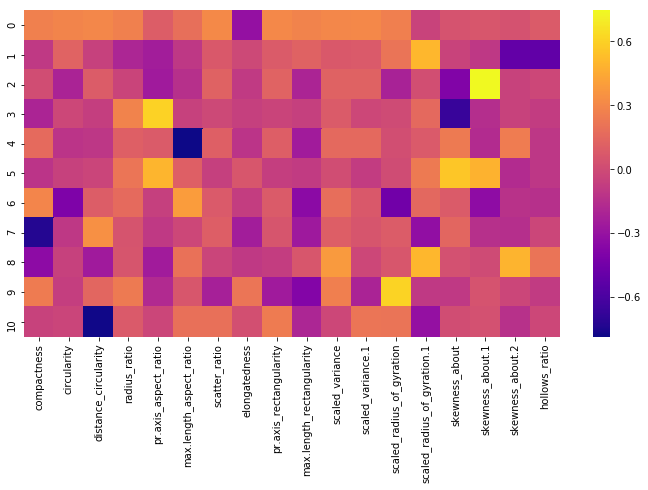

In [0]:
# Analysing the relation ship between different pc components and actual independent variables.
df_comp = pd.DataFrame(sklearn_pca.components_,columns=list(dfInputDataNorm))
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

Skewness_about.1 , Distance_circularity , compactness ,max.length_aspect_ratio ,skewness_about and elongatedness contains much information and are very important independent variables in the model.


In [0]:
# table comparing the results of different models on different no of PCA components
Score_PCA.columns=['Name' , 'Score' ,'NO of Components']
Score_PCA

,Name,Score,NO of Components
0,Logistic Regression,81.17647058823529,8.0
1,Naive Bayes Theorem,86.47058823529412,8.0
2,Support Vector Machines,94.11764705882352,8.0
3,Logistic Regression,85.88235294117646,9.0
4,Naive Bayes Theorem,83.52941176470588,9.0
5,Support Vector Machines,94.70588235294117,9.0
6,Logistic Regression,88.23529411764706,10.0
7,Naive Bayes Theorem,87.05882352941177,10.0
8,Support Vector Machines,94.70588235294117,10.0
9,Logistic Regression,91.17647058823529,11.0


In [0]:
# table comparing the results of different models when PCA is not applied
pdFrameNoPCA

,Name,Score,NO of Components
0,Logistic Regression,95.29411764705881,18.0
1,Naive Bayes Theorem,61.76470588235294,18.0
2,Support Vector Machines,97.05882352941177,18.0


#CONCLUSION

We can clearly see that Support Vector machine with 11 components provide the same result as Support Vector machine with no PCA applied .Moreover , if we look at the classification report , the   f1 score for car is 99 % , f1 score for  bus is 97%  and f1 score for van is 95%.
The model is able to classify differernt objects with more than 95% accuracy.

In the above model, we have also tried adding polynomial features since  there is some non linear relationships between the attributes , but this is  giving  almost  same results.Hence  dropped the idea.

Hence support vector machine with 11 components seems  to give best  results in production.
